</br>

# Project: Gapminder Data Analysis for Country Development
</br>

# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report, I have selected the following datasets for analysis from <a href="https://www.gapminder.org/data/">the Gapminder foundation's database</a>. 

<ul>
       <li>Total GDP (PPP, inflation-adjusted): PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. A PPP dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. Data are in constant 2005 international dollars.</li>
       <li>Total population</li>
       <li>Gini coefficient: Gini shows income inequality in a society. A higher number means more inequality.</li>
       <li>Mean years in school (women of reproductive age 15 to 44): The average number of years of school attended by all people in the age and gender group specified, including primary, secondary and tertiary education.</li>
       <li>Child mortality (0-5 year-olds dying per 1000 born): Death of children under five years of age per 1,000 live births.</li>
       <li>Life expectancy (years): The average number of years a newborn child would live if current mortality patterns were to stay the same.</li>
</ul>



The questions I'm planning on exploring are:

<ul>
    <li>Which countries have shown the least and the most development measured by these datasets and given variables between 1970 and 2009?</li>
    <li>What is the least and the most developed country in the world with the variables given?</li>
    <li>Have certain regions developed more within the given timeframe?</li>
</ul>

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Importing the Python libraries required for the analysis. Adding the magic of inline matplotlib to the project as well.

In [893]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

Next, I am loading in all the datasets and checking for their cleanliness by looking for instances of missing or possibly errant data. I will document the steps carefully and justify my cleaning decisions.

In [894]:
df_gdp = pd.read_csv("total_gdp_ppp_inflation_adjusted.csv", index_col='country')
years = ['1970','2009']
df_gdp[years].info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1970    194 non-null    float64
 1   2009    193 non-null    float64
dtypes: float64(2)
memory usage: 4.5+ KB


In the GDP dataset, there seems to be a value missing. This will be cleaned in the following data cleaning section of the analysis.

In [895]:
df_pop = pd.read_csv('population_total.csv', index_col='country')
df_pop[years].info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1970    195 non-null    int64
 1   2009    195 non-null    int64
dtypes: int64(2)
memory usage: 4.6+ KB


Everything seems to be ok with the population dataset.

In [896]:
df_gini = pd.read_csv('gini.csv', index_col='country')
df_gini[years].info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1970    195 non-null    float64
 1   2009    195 non-null    float64
dtypes: float64(2)
memory usage: 4.6+ KB


Everything seems to be ok with the GINI index dataset.

In [897]:
df_school_fem = pd.read_csv('mean_years_in_school_women_of_reproductive_age_15_to_44.csv', index_col='country')
df_school_fem[years].info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1970    174 non-null    float64
 1   2009    174 non-null    float64
dtypes: float64(2)
memory usage: 4.1+ KB


There seems to be less data available in the "mean years in school" dataset when compared with other datasets. Some countries are missing data. Since this is the only dataset missing this many values, I will leave them for now.

In [898]:
df_child_mort = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv', index_col='country')
df_child_mort[years].info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1970    195 non-null    float64
 1   2009    195 non-null    float64
dtypes: float64(2)
memory usage: 4.6+ KB


Everything seems to be ok with the child mortality dataset.

In [899]:
df_life_exp = pd.read_csv('life_expectancy_years.csv', index_col='country')
df_life_exp[years].info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1970    187 non-null    float64
 1   2009    187 non-null    float64
dtypes: float64(2)
memory usage: 4.4+ KB


Everything seems to be ok with the life expectancy dataset.

Importing the regions:

In [900]:
df_regions = pd.read_csv('regions.csv', sep=';', index_col='country')
df_regions['eight_regions']

country
Afghanistan             asia_west
Albania               europe_east
Algeria              africa_north
Andorra               europe_west
Angola         africa_sub_saharan
                      ...        
Vietnam         east_asia_pacific
Yemen                   asia_west
Zambia         africa_sub_saharan
Zimbabwe       africa_sub_saharan
South Sudan    africa_sub_saharan
Name: eight_regions, Length: 196, dtype: object

### Data Cleaning

In this section of the report, I will trim and clean the data for analysis.

The structure of the data is in multiple datasets with hundreds of data points and years. I will trim the data so that I will have data of the years 1970 and 2009 since these are the year limits in the "mean years of school" dataset and therefore define the maximum time period from other datasets as well. The comparison will be made between these years.

There's only one value that needs to be cleaned and it's in the GDP data since there are no values in the 2009 for Tuvalu. There are also some missing values in the "mean school years" data but since deleting data from all those countries to match would mean the need to remove a lot of data from all the other datasets, I have decided that I will just leave them as is.

I will start cleaning the data by removing the null value from the GDP data.

In [901]:
df_gdp[years].isna().sum()

1970    0
2009    1
dtype: int64

In [902]:
df_gdp.loc[df_gdp['2009'].isnull()]

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,
Tuvalu,2530000.0,2530000.0,2530000.0,2530000.0,2530000.0,2530000.0,2530000.0,2530000.0,2530000.0,2530000.0,...,46400000.0,48300000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [903]:
df_gdp = df_gdp.drop('Tuvalu')
df_gdp.loc[df_gdp['2009'].isnull()]

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,


In [904]:
df_gdp[years].info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1970    193 non-null    float64
 1   2009    193 non-null    float64
dtypes: float64(2)
memory usage: 4.5+ KB


Next, I will rename the columns accordingly and merge the data into one dataframe.

In [905]:
first_year = ['1970']
final_year = ['2009']

In [906]:
df_gdp_first_year = df_gdp[first_year]
df_gdp_first_year = df_gdp_first_year.rename(columns={'1970': 'gdp_1970'})
df_gdp_final_year = df_gdp[final_year]
df_gdp_final_year = df_gdp_final_year.rename(columns={'2009': 'gdp_2009'})

In [907]:
df_pop_first_year = df_pop[first_year]
df_pop_first_year = df_pop_first_year.rename(columns={'1970': 'pop_1970'})
df_pop_final_year = df_pop[final_year]
df_pop_final_year = df_pop_final_year.rename(columns={'2009': 'pop_2009'})

In [908]:
df_gini_first_year = df_gini[first_year]
df_gini_first_year = df_gini_first_year.rename(columns={'1970': 'gini_1970'})
df_gini_final_year = df_gini[final_year]
df_gini_final_year = df_gini_final_year.rename(columns={'2009': 'gini_2009'})

In [909]:
df_school_fem_first_year = df_school_fem[first_year]
df_school_fem_first_year = df_school_fem_first_year.rename(columns={'1970': 'sf_1970'})
df_school_fem_final_year = df_school_fem[final_year]
df_school_fem_final_year = df_school_fem_final_year.rename(columns={'2009': 'sf_2009'})

In [910]:
df_child_mort_first_year = df_child_mort[first_year]
df_child_mort_first_year = df_child_mort_first_year.rename(columns={'1970': 'cm_1970'})
df_child_mort_final_year = df_child_mort[final_year]
df_child_mort_final_year = df_child_mort_final_year.rename(columns={'2009': 'cm_2009'})

In [911]:
df_life_exp_first_year = df_life_exp[first_year]
df_life_exp_first_year = df_life_exp_first_year.rename(columns={'1970': 'le_1970'})
df_life_exp_final_year = df_life_exp[final_year]
df_life_exp_final_year = df_life_exp_final_year.rename(columns={'2009': 'le_2009'})

In [912]:
df_first_year = df_gdp_first_year
df_first_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gdp_1970  193 non-null    float64
dtypes: float64(1)
memory usage: 3.0+ KB


In [913]:
df_first_year['pop_1970'] = df_pop_first_year
df_first_year['gini_1970'] = df_gini_first_year
df_first_year['sf_1970'] = df_school_fem_first_year
df_first_year['cm_1970'] = df_child_mort_first_year
df_first_year['le_1970'] = df_life_exp_first_year
df_first_year.describe()

,gdp_1970,pop_1970,gini_1970,sf_1970,cm_1970,le_1970
count,1.930000e+02,1.930000e+02,193.000000,174.000000,193.000000,187.000000
mean,1.345194e+11,1.905410e+07,39.970984,3.868391,126.224352,60.163102
std,4.884332e+11,7.459726e+07,10.711573,2.824026,91.737220,9.562819
min,4.100000e+07,6.550000e+03,17.800000,0.100000,10.800000,39.700000
25%,3.110000e+09,7.240000e+05,33.200000,1.400000,49.300000,51.650000
50%,1.370000e+10,3.760000e+06,40.000000,3.350000,97.900000,62.300000
75%,8.030000e+10,1.040000e+07,45.700000,6.200000,193.000000,68.800000
max,5.090000e+12,8.280000e+08,70.700000,11.800000,372.000000,75.500000


In [914]:
df_final_year = df_gdp_final_year
df_final_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gdp_2009  193 non-null    float64
dtypes: float64(1)
memory usage: 3.0+ KB


In [915]:
df_final_year['pop_2009'] = df_pop_final_year
df_final_year['gini_2009'] = df_gini_final_year
df_final_year['sf_2009'] = df_school_fem_final_year
df_final_year['cm_2009'] = df_child_mort_final_year
df_final_year['le_2009'] = df_life_exp_final_year
df_final_year.describe()

,gdp_2009,pop_2009,gini_2009,sf_2009,cm_2009,le_2009
count,1.930000e+02,1.930000e+02,193.000000,174.000000,193.000000,187.000000
mean,4.336330e+11,3.541498e+07,39.350777,8.820115,39.065078,70.210695
std,1.502258e+12,1.354156e+08,7.630689,3.571855,39.861068,8.705072
min,7.980000e+07,9.950000e+03,24.500000,0.800000,2.720000,44.900000
25%,1.160000e+10,1.740000e+06,33.500000,5.750000,8.830000,63.300000
50%,4.610000e+10,7.470000e+06,40.000000,9.650000,20.900000,72.900000
75%,2.730000e+11,2.290000e+07,43.600000,11.900000,61.400000,76.750000
max,1.490000e+13,1.360000e+09,63.400000,14.700000,172.000000,83.100000


In [916]:
df_final_year['region'] = df_regions['eight_regions']
df_final_year.loc[:, 'region'].isnull().sum()

5

In [917]:
df_final_year[df_final_year['region'].isnull()]

,gdp_2009,pop_2009,gini_2009,sf_2009,cm_2009,le_2009,region
country,,,,,,,
"Congo, Dem. Rep.",2.560000e+10,62400000,42.1,5.5,120.0,57.1,NaN
"Congo, Rep.",2.030000e+10,4150000,48.4,7.7,65.1,59.1,NaN
Eswatini,7.130000e+09,1060000,51.6,9.1,100.0,44.9,NaN
"Micronesia, Fed. Sts.",3.590000e+08,103000,41.2,NaN,41.2,66.9,NaN
North Macedonia,2.290000e+10,2070000,42.7,11.2,10.9,75.5,NaN


In [918]:
df_final_year.loc['Congo, Dem. Rep.', 'region'] = 'africa_sub_saharan'
df_final_year.loc['Congo, Rep.', 'region'] = 'africa_sub_saharan'
df_final_year.loc['Eswatini', 'region'] = 'africa_sub_saharan'
df_final_year.loc['Micronesia, Fed. Sts.', 'region'] = 'east_asia_pacific'
df_final_year.loc['North Macedonia', 'region'] = 'europe_east'

In [919]:
frames = [df_first_year, df_final_year]
df_dev_stats = pd.concat(frames, axis=1)
df_dev_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gdp_1970   193 non-null    float64
 1   pop_1970   193 non-null    int64  
 2   gini_1970  193 non-null    float64
 3   sf_1970    174 non-null    float64
 4   cm_1970    193 non-null    float64
 5   le_1970    187 non-null    float64
 6   gdp_2009   193 non-null    float64
 7   pop_2009   193 non-null    int64  
 8   gini_2009  193 non-null    float64
 9   sf_2009    174 non-null    float64
 10  cm_2009    193 non-null    float64
 11  le_2009    187 non-null    float64
 12  region     193 non-null    object 
dtypes: float64(10), int64(2), object(1)
memory usage: 26.1+ KB


In [920]:
df_dev_stats.describe()

,gdp_1970,pop_1970,gini_1970,sf_1970,cm_1970,le_1970,gdp_2009,pop_2009,gini_2009,sf_2009,cm_2009,le_2009
count,1.930000e+02,1.930000e+02,193.000000,174.000000,193.000000,187.000000,1.930000e+02,1.930000e+02,193.000000,174.000000,193.000000,187.000000
mean,1.345194e+11,1.905410e+07,39.970984,3.868391,126.224352,60.163102,4.336330e+11,3.541498e+07,39.350777,8.820115,39.065078,70.210695
std,4.884332e+11,7.459726e+07,10.711573,2.824026,91.737220,9.562819,1.502258e+12,1.354156e+08,7.630689,3.571855,39.861068,8.705072
min,4.100000e+07,6.550000e+03,17.800000,0.100000,10.800000,39.700000,7.980000e+07,9.950000e+03,24.500000,0.800000,2.720000,44.900000
25%,3.110000e+09,7.240000e+05,33.200000,1.400000,49.300000,51.650000,1.160000e+10,1.740000e+06,33.500000,5.750000,8.830000,63.300000
50%,1.370000e+10,3.760000e+06,40.000000,3.350000,97.900000,62.300000,4.610000e+10,7.470000e+06,40.000000,9.650000,20.900000,72.900000
75%,8.030000e+10,1.040000e+07,45.700000,6.200000,193.000000,68.800000,2.730000e+11,2.290000e+07,43.600000,11.900000,61.400000,76.750000
max,5.090000e+12,8.280000e+08,70.700000,11.800000,372.000000,75.500000,1.490000e+13,1.360000e+09,63.400000,14.700000,172.000000,83.100000


In [921]:
df_dev_stats_region = pd.DataFrame(df_dev_stats, columns = ['region'])
df_dev_stats_region

,region
country,
Afghanistan,asia_west
Albania,europe_east
Algeria,africa_north
Andorra,europe_west
Angola,africa_sub_saharan
...,...
Venezuela,america_south
Vietnam,east_asia_pacific
Yemen,asia_west


<a id='eda'></a>
## Exploratory Data Analysis

At this stage I will start exploring the data. 

I will be computing some statistics and creating visualizations with the goal of addressing the research questions.

### Research Question 1: Which countries have had the least and the most growth in their GDP per capita?

What is the GDP per capita? GDP per capita is the country's gross domestic product (at purchasing power parity) per capita, i.e., the purchasing power parity (PPP) value of all final goods and services produced within a country in a given year, divided by the average (or mid-year) population for the same year.

In [922]:
df_gdp_per_capita = df_gdp / df_pop
df_gdp_per_capita[years].describe()

,1970,2009
count,193.000000,193.000000
mean,9748.441243,15858.123766
std,20105.958672,17956.753241
min,491.489362,410.256410
25%,2003.231018,2896.694215
50%,4276.169265,9321.357285
75%,10341.463415,21787.148594
max,224462.365591,107272.727273


Calculating the countries with the lowest GDP per capita in 2009.

In [923]:
df_gdp_per_capita_lo_final_year = df_gdp_per_capita[final_year].sort_values(final_year)
df_gdp_per_capita_lo_final_year[final_year].head(20)

,2009
country,
"Congo, Dem. Rep.",410.256410
Somalia,479.487179
Burundi,689.285714
Liberia,690.666667
Malawi,730.496454
Niger,740.506329
Mozambique,838.427948
Central African Republic,903.225806
Ethiopia,922.535211


Calculating the countries with the highest GDP per capita in 2009.

In [924]:
df_per_capita_hi_final_year = df_gdp_per_capita[final_year].sort_values(final_year, ascending=False)
df_per_capita_hi_final_year[final_year].head(20)

,2009
country,
Qatar,107272.727273
Luxembourg,88732.394366
Liechtenstein,82633.053221
Kuwait,78723.404255
Brunei,70833.333333
Norway,62732.919255
Singapore,62374.245473
Switzerland,49286.640726
United Arab Emirates,49242.424242


Calculating the descriptive statistics for GDP per capita in 1970.

In [925]:
df_gdp_per_capita_first_year = df_gdp_per_capita[first_year]
df_gdp_per_capita_first_year.describe()

,1970
count,193.000000
mean,9748.441243
std,20105.958672
min,491.489362
25%,2003.231018
50%,4276.169265
75%,10341.463415
max,224462.365591


Calculating the countries with the lowest GDP per capita in 1970.

In [926]:
df_gdp_per_capita_lo_first_year = df_gdp_per_capita[first_year].sort_values('1970')
df_gdp_per_capita_lo_first_year[first_year].head(20)

,1970
country,
Malawi,491.489362
Mozambique,670.731707
Rwanda,696.808511
Burundi,750.000000
Timor-Leste,756.993007
Ethiopia,785.211268
Lesotho,787.378641
Mali,843.697479
Guinea,925.301205


Calculating the countries with the highest GDP per capita in 1970.

In [927]:
df_gdp_per_capita_hi_first_year = df_gdp_per_capita[first_year].sort_values('1970', ascending=False)
df_gdp_per_capita_hi_first_year[first_year].head(20)

,1970
country,
Kuwait,224462.365591
Qatar,120000.000000
Brunei,72076.923077
Libya,64788.732394
Saudi Arabia,38698.630137
Liechtenstein,35821.596244
Switzerland,35447.154472
Andorra,32469.135802
Japan,31904.761905


Comparing GDP per capita between 1970 and 2009.

In [928]:
df_gdp_per_capita_change = df_gdp_per_capita['2009'] / df_gdp_per_capita['1970']
df_gdp_per_capita_change.describe()

count    193.000000
mean       2.183895
std        2.170472
min        0.302772
25%        1.226075
50%        1.778914
75%        2.329570
max       23.457206
dtype: float64

List of countries with the least change in GDP per capita between 1970 and 2009:

In [929]:
low_movers_gdp_change = df_gdp_per_capita_change.sort_values()
low_movers_gdp_change.head(20)

country
Congo, Dem. Rep.            0.302772
Liberia                     0.317027
Kuwait                      0.350720
Tajikistan                  0.360942
Somalia                     0.419704
Libya                       0.463295
Zimbabwe                    0.543560
Togo                        0.557708
Madagascar                  0.558491
Palau                       0.581176
Central African Republic    0.581793
Moldova                     0.583880
Sierra Leone                0.588093
Niger                       0.606113
Nicaragua                   0.606636
Kiribati                    0.629696
Djibouti                    0.631853
Zambia                      0.677149
Cote d'Ivoire               0.685725
Haiti                       0.789130
dtype: float64

List of countries with the most change in GDP per capita between 1970 and 2009:

In [930]:
top_movers_gdp_change = df_gdp_per_capita_change.sort_values(ascending=False)
top_movers_gdp_change.head(20)

country
Equatorial Guinea      23.457206
South Korea            13.456216
Botswana                7.445589
China                   7.392857
Maldives                6.745192
Singapore               6.090315
Malta                   6.071811
Bhutan                  5.953029
Gabon                   5.416361
Mauritius               5.385724
St. Kitts and Nevis     5.196759
Thailand                5.181602
Malaysia                4.840035
Cape Verde              4.369656
Grenada                 4.091629
Vietnam                 4.027474
Ireland                 3.884552
Cyprus                  3.883004
Antigua and Barbuda     3.832157
Indonesia               3.710730
dtype: float64

### Research Question 2: Which countries have had the least and the most change in the GINI index?

Calculating the countries with the highest GINI index (most inequality in income) in 2009.

In [931]:
df_gini_low_final_year = df_gini[years].sort_values(final_year, ascending=False)
df_gini_low_final_year.head(20)

,1970,2009
country,,
South Africa,68.5,63.4
Namibia,49.3,61.4
Botswana,53.8,61.2
Suriname,48.6,60.6
Central African Republic,70.7,55.7
Zambia,68.2,55.3
Colombia,53.0,54.6
Honduras,67.3,54.4
Brazil,49.1,53.8


Calculating the countries with the lowest GINI index (least inequality in income) in 2009.

In [932]:
df_gini_hi_final_year = df_gini[years].sort_values(final_year)
df_gini_hi_final_year.head(20)

,1970,2009
country,,
Slovenia,33.8,24.5
Ukraine,31.4,25.7
Norway,26.3,26.3
Czech Republic,18.8,26.3
Denmark,20.8,26.5
Slovak Republic,23.0,26.7
Sweden,23.5,27.6
Finland,30.0,27.8
Timor-Leste,35.9,28.1


Comparing GINI index between 1970 and 2009.

In [933]:
df_gini_change = df_gini['2009'] / df_gini['1970']
df_gini_change.describe()

count    195.000000
mean       1.023097
std        0.214442
min        0.577287
25%        0.901193
50%        1.000000
75%        1.107553
max        1.897196
dtype: float64

List of countries moving away from income equality:

In [934]:
neg_movers_gini_change = df_gini_change.sort_values(ascending=False)
neg_movers_gini_change.head(20)

country
Russia            1.897196
China             1.824034
Romania           1.820225
Moldova           1.722513
Bangladesh        1.611940
Bulgaria          1.599057
Turkmenistan      1.562290
Tanzania          1.511538
Croatia           1.454955
Czech Republic    1.398936
Latvia            1.391473
Georgia           1.385714
Hungary           1.383495
Poland            1.352227
Rwanda            1.330623
Lithuania         1.326996
Jamaica           1.281690
Sri Lanka         1.274247
Denmark           1.274038
Paraguay          1.254902
dtype: float64

List of countries moving towards income equality:

In [935]:
pos_movers_gini_change = df_gini_change.sort_values()
pos_movers_gini_change.head(20)

country
Tunisia                     0.577287
Ethiopia                    0.614943
Gabon                       0.627692
Sierra Leone                0.664193
Mali                        0.677043
Venezuela                   0.696880
Lebanon                     0.701987
Guinea                      0.712092
Senegal                     0.715827
Armenia                     0.718447
Estonia                     0.719457
Slovenia                    0.724852
Algeria                     0.726817
Kazakhstan                  0.737113
Kenya                       0.737624
Togo                        0.740433
Timor-Leste                 0.782730
Central African Republic    0.787836
Greece                      0.788863
Angola                      0.791971
dtype: float64

### Research Question 3: Which countries have the least and the most change in the mean amount of years that girls are educated?

List of countries with the most amount of mean years of education in 1970:

In [936]:
df_school_fem[first_year].sort_values(first_year, ascending=False).head(20)

,1970
country,
United States,11.8
Canada,9.6
Czech Republic,9.4
Japan,9.3
Australia,9.3
United Kingdom,8.8
Denmark,8.7
Ukraine,8.7
Poland,8.7


List of countries with the most amount of mean years of education in 2009:

In [937]:
df_school_fem[final_year].sort_values(final_year, ascending=False).head(20)

,2009
country,
Canada,14.7
Norway,14.2
South Korea,14.1
Cyprus,13.6
Antigua and Barbuda,13.5
United States,13.5
Japan,13.4
Czech Republic,13.3
New Zealand,13.3


Comparing the girls' mean amount of years of education between 1970 and 2009.

List of countries with the most growth in the years:

In [938]:
df_school_fem_change = df_school_fem['2009'] / df_school_fem['1970']
df_school_fem_pos_change = df_school_fem_change.sort_values(ascending=False)
df_school_fem_pos_change.head(20)

country
Yemen            19.000000
Niger            13.000000
Nepal            10.666667
Guinea-Bissau    10.500000
Ethiopia         10.500000
Eritrea          10.000000
Comoros           9.600000
Timor-Leste       9.400000
Somalia           8.500000
Pakistan          8.400000
Mauritania        8.250000
Afghanistan       8.000000
Burkina Faso      8.000000
Chad              7.500000
Djibouti          7.200000
Sudan             7.125000
Benin             7.000000
Togo              6.833333
Haiti             6.333333
Morocco           6.142857
dtype: float64

List of countries with the least growth in the years:

In [939]:
df_school_fem_least_change = df_school_fem_change.sort_values(ascending=True)
df_school_fem_least_change.head(20)

country
United States     1.144068
Australia         1.365591
Czech Republic    1.414894
Poland            1.425287
Japan             1.440860
Denmark           1.459770
Switzerland       1.481481
Latvia            1.481928
Ukraine           1.482759
United Kingdom    1.488636
Georgia           1.511905
Hungary           1.512500
Estonia           1.519481
Austria           1.520000
Belarus           1.530864
Canada            1.531250
Bulgaria          1.550000
Sweden            1.552941
Israel            1.590361
Lithuania         1.594937
dtype: float64

### Research Question 4: Which countries have the least and the most change in the child mortality?

List of countries with the lowest child mortality in 2009:

In [940]:
df_child_mort_lo_final_year = df_child_mort[final_year].sort_values(final_year)
df_child_mort_lo_final_year[final_year].head(20)

,2009
country,
Iceland,2.72
Singapore,2.83
Luxembourg,3.08
San Marino,3.08
Sweden,3.13
Finland,3.21
Japan,3.30
Norway,3.38
Slovenia,3.39


List of countries with the lowest child mortality in 1970:

In [941]:
df_child_mort_lo_first_year = df_child_mort[first_year].sort_values(first_year)
df_child_mort_lo_first_year[first_year].head(20)

,1970
country,
Monaco,10.8
Sweden,13.4
Netherlands,15.8
Iceland,16.0
Finland,16.1
Norway,16.2
Denmark,16.6
Japan,17.4
France,18.2


List of countries with the most change in child mortality:

In [942]:
df_child_mort_change = df_child_mort['2009'] / df_child_mort['1970']
df_top_child_mort_change = df_child_mort_change.sort_values()
df_top_child_mort_change.head(20)

country
Oman                      0.051528
Maldives                  0.057752
Portugal                  0.058065
South Korea               0.070425
Saudi Arabia              0.071271
San Marino                0.076427
United Arab Emirates      0.088855
Bosnia and Herzegovina    0.098560
Turkey                    0.098936
Iran                      0.100976
Singapore                 0.104428
Tunisia                   0.105000
Cyprus                    0.108286
Chile                     0.110513
Albania                   0.114286
Bahrain                   0.117678
Algeria                   0.117917
Serbia                    0.118569
Italy                     0.120833
Nicaragua                 0.123121
dtype: float64

List of countries with the least change in child mortality:

In [943]:
df_low_child_mort_change = df_child_mort_change.sort_values(ascending=False)
df_low_child_mort_change.head(20)

country
Zimbabwe                    0.806087
Central African Republic    0.687500
Somalia                     0.683544
Lesotho                     0.601124
Chad                        0.594595
Eswatini                    0.574713
Sao Tome and Principe       0.557225
Cameroon                    0.533333
Guyana                      0.518318
Namibia                     0.517347
Mauritania                  0.517098
Sierra Leone                0.514970
Sudan                       0.500641
Micronesia, Fed. Sts.       0.493413
Marshall Islands            0.491824
Palau                       0.489754
Equatorial Guinea           0.489451
Congo, Dem. Rep.            0.487805
Nigeria                     0.484211
Angola                      0.476015
dtype: float64

### Research Question 5: Which countries have the least and the most change in the life expectancy?

List of countries with the lowest life expectancy in 2009:

In [944]:
df_life_exp[final_year].sort_values(final_year).head(20)

,2009
country,
Eswatini,44.9
Lesotho,46.5
Zimbabwe,47.2
Central African Republic,47.4
Mozambique,51.7
Malawi,52.5
Zambia,54.5
South Africa,54.5
Sierra Leone,54.6


List of countries with the highest life expectancy in 2009:

In [945]:
df_life_exp[final_year].sort_values(final_year, ascending=False).head(20)

,2009
country,
Japan,83.1
Singapore,82.9
Andorra,82.2
Switzerland,82.2
Iceland,82.1
Spain,81.7
Australia,81.7
Italy,81.7
Israel,81.3


List of countries with the least change or even lower life expectancy in 2009 than in 1970:

In [946]:
df_life_exp_change = df_life_exp['2009'] / df_life_exp['1970']
df_low_life_exp_change = df_life_exp_change.sort_values()
df_low_life_exp_change.head(20)

country
Zimbabwe                    0.829525
Lesotho                     0.833333
Eswatini                    0.876953
South Africa                0.941278
Namibia                     0.979487
Belarus                     0.985994
Russia                      0.992743
Central African Republic    1.002114
Fiji                        1.007485
Ukraine                     1.008633
Zambia                      1.009259
Tonga                       1.016248
Lithuania                   1.028129
Kenya                       1.030822
Bulgaria                    1.032258
Latvia                      1.034091
North Korea                 1.047407
Botswana                    1.048474
Montenegro                  1.051389
Samoa                       1.053973
dtype: float64

List of countries with the most positive change:

In [947]:
df_hi_life_exp_change = df_life_exp_change.sort_values(ascending=False)
df_hi_life_exp_change.head(20)

country
Maldives             1.924020
Peru                 1.612500
Yemen                1.607143
Bangladesh           1.566893
Timor-Leste          1.528509
Oman                 1.527383
Lao                  1.513189
Mali                 1.486146
Cambodia             1.483296
Bhutan               1.456967
Guatemala            1.440404
Ethiopia             1.434884
Bolivia              1.415663
Myanmar              1.397380
Equatorial Guinea    1.397291
Nepal                1.393939
Turkey               1.388889
Guinea-Bissau        1.385965
Egypt                1.364173
Eritrea              1.363850
dtype: float64

### Research Question 6: How do all of these variables correlate?

Visualizing a scatter plot and a correlation heatmap of the year 1970 with all the variables:

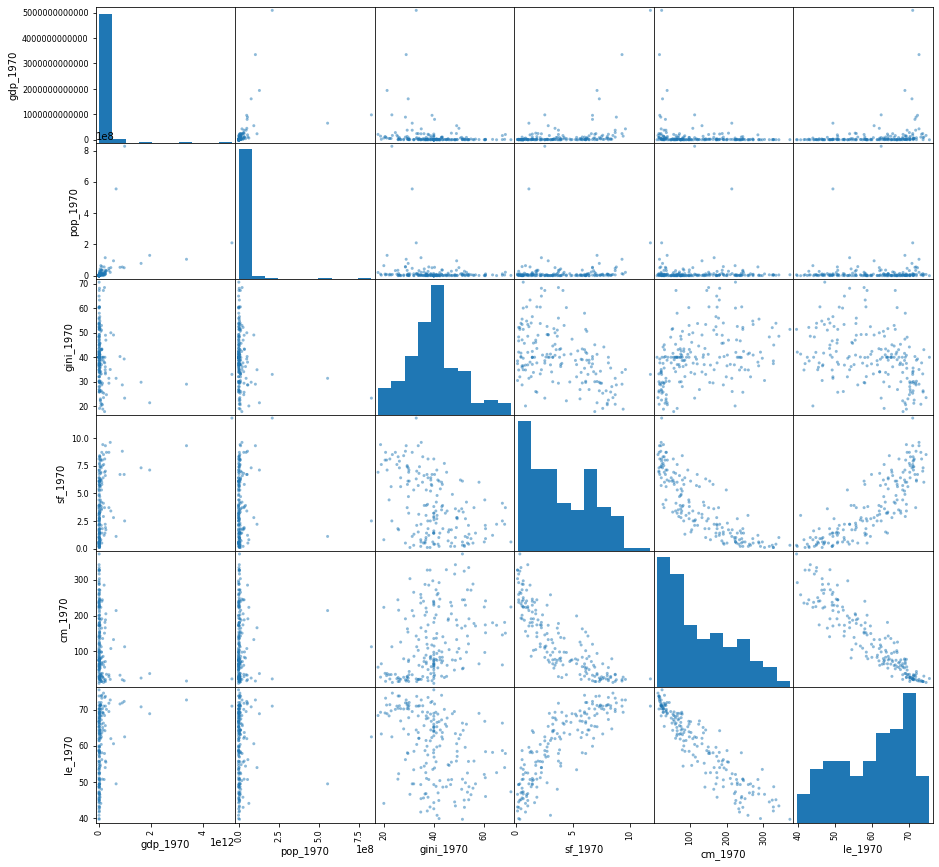

In [948]:
pd.plotting.scatter_matrix(df_first_year, figsize=(15, 15));

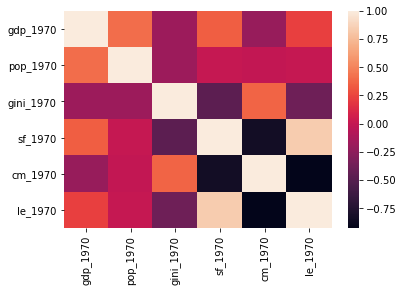

In [949]:
df_c_first = df_first_year.corr()
sn.heatmap(df_c_first);

Visualizing a scatter plot and a correlation heatmap of the year 2009 with all the variables:

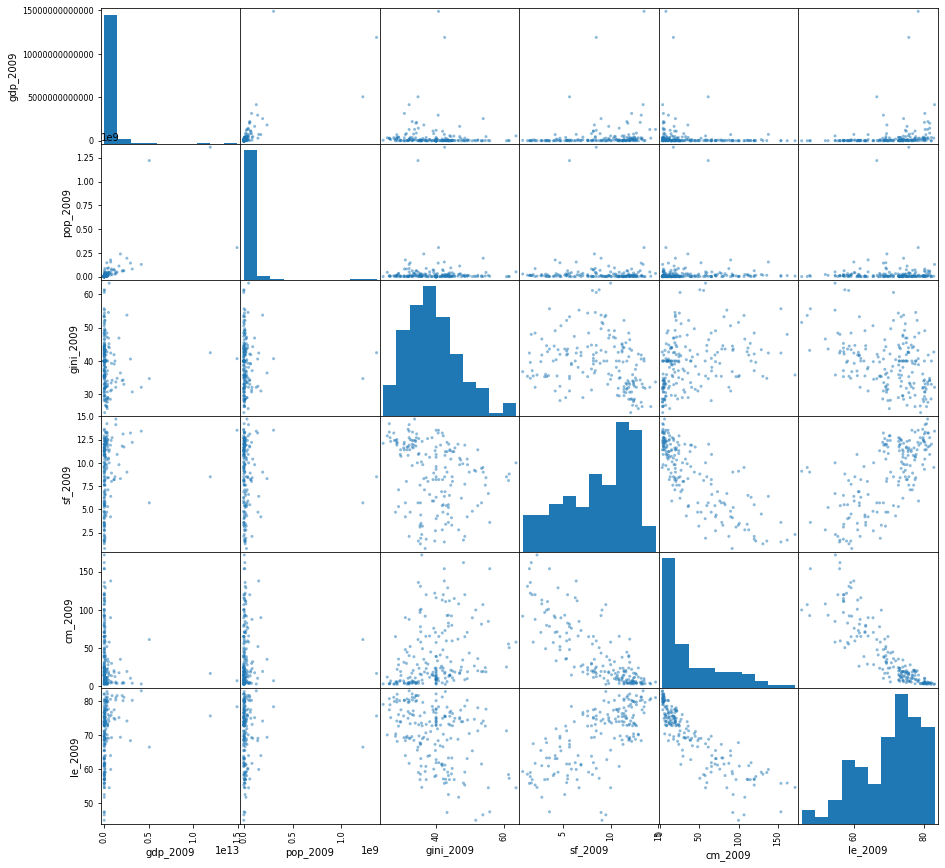

In [950]:
pd.plotting.scatter_matrix(df_final_year, figsize=(15, 15));

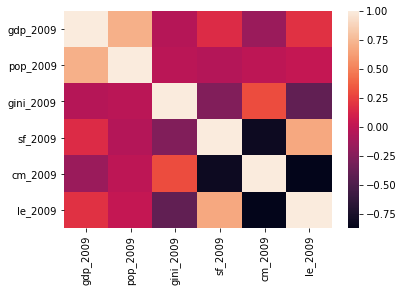

In [951]:
df_c_final = df_final_year.corr()
sn.heatmap(df_c_final);

Next, I will build dataframes measuring the amount of change within the time period and all the variables. I will start by combining all the values of change with the GDP per capita of 2009.

In [952]:
df_least_change_gdp = pd.DataFrame(low_movers_gdp_change, columns = ['gdp'])
df_least_change_gini = pd.DataFrame(neg_movers_gini_change, columns = ['gini'])
df_least_change_sf = pd.DataFrame(df_school_fem_least_change, columns = ['sf'])
df_least_change_cm = pd.DataFrame(df_low_child_mort_change, columns = ['cm'])
df_least_change_le = pd.DataFrame(df_low_life_exp_change, columns = ['le'])

least_change_frames = [df_gdp_per_capita_lo_final_year, df_least_change_gdp, df_least_change_gini, df_least_change_sf, df_least_change_cm, df_least_change_le]
df_least_change_dev = pd.concat(least_change_frames, axis=1)
df_least_change_dev.rename(columns={'2009':'gdp_2009'}, inplace=True)
df_least_change_dev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Congo, Dem. Rep. to Tuvalu
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gdp_2009  193 non-null    float64
 1   gdp       193 non-null    float64
 2   gini      195 non-null    float64
 3   sf        174 non-null    float64
 4   cm        195 non-null    float64
 5   le        187 non-null    float64
dtypes: float64(6)
memory usage: 10.7+ KB


In [953]:
df_least_change_dev_low_gdp = df_least_change_dev[df_least_change_dev['gdp_2009'] >= 1].head(30)
df_least_change_dev_low_gdp

,gdp_2009,gdp,gini,sf,cm,le
"Congo, Dem. Rep.",410.256410,0.302772,0.992925,3.928571,0.487805,1.132937
Somalia,479.487179,0.419704,1.027837,8.500000,0.683544,1.133874
Burundi,689.285714,0.919048,1.011461,5.166667,0.387200,1.253304
Liberia,690.666667,0.317027,0.975342,5.833333,0.351916,1.304069
Malawi,730.496454,1.486291,0.897119,5.200000,0.272515,1.209677
Niger,740.506329,0.606113,0.919481,13.000000,0.400612,1.357309
Mozambique,838.427948,1.250020,0.872659,5.600000,0.397059,1.095339
Central African Republic,903.225806,0.581793,0.787836,6.000000,0.687500,1.002114
Ethiopia,922.535211,1.174888,0.614943,10.500000,0.359426,1.434884
Zimbabwe,1120.000000,0.543560,1.077307,3.461538,0.806087,0.829525


In [954]:
low_gdp_2009_list = list(df_least_change_dev_low_gdp.index.values)
low_gdp_2009_list

['Congo, Dem. Rep.',
 'Somalia',
 'Burundi',
 'Liberia',
 'Malawi',
 'Niger',
 'Mozambique',
 'Central African Republic',
 'Ethiopia',
 'Zimbabwe',
 'Togo',
 'Guinea',
 'Sierra Leone',
 'Guinea-Bissau',
 'Rwanda',
 'Uganda',
 'Madagascar',
 'North Korea',
 'Burkina Faso',
 'Tanzania',
 'Gambia',
 'Benin',
 'Haiti',
 'Comoros',
 'Timor-Leste',
 'Chad',
 'Mali',
 'Afghanistan',
 'Kiribati',
 'Solomon Islands']

I made a quick checkup tool to check if a country is in the bottom 20 of GDP per capita in 2009.

In [955]:
#function to check if a country is in the bottom 20 list of GDP per capita in 2009

def lowest_GDP_2009(country):
    
    if country in low_gdp_2009_list:
        print(country + ' was in the bottom 20 of GDP per capita in 2009.')
    else:
        print(country + ' was not in the bottom 20 of GDP per capita in 2009.')

In [956]:
lowest_GDP_2009('Finland')

Finland was not in the bottom 20 of GDP per capita in 2009.


The lowest 20 in GDP per capita as a bar chart:

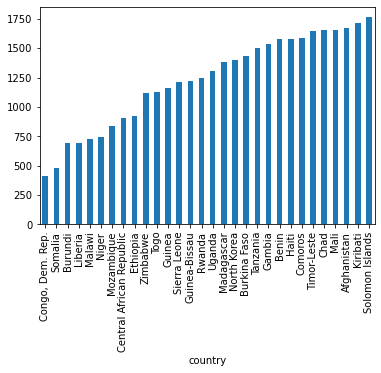

In [957]:
df_gdp_per_capita['2009'].loc[low_gdp_2009_list].plot(kind='bar');

Converting data into dataframes to be able to combine them into a bigger dataframe with all the data of calculated change.

In [958]:
df_most_change_gdp = pd.DataFrame(top_movers_gdp_change, columns = ['gdp'])
df_most_change_gini = pd.DataFrame(pos_movers_gini_change, columns = ['gini'])
df_most_change_sf = pd.DataFrame(df_school_fem_pos_change, columns = ['sf'])
df_most_change_cm = pd.DataFrame(df_top_child_mort_change, columns = ['cm'])
df_most_change_le = pd.DataFrame(df_hi_life_exp_change, columns = ['le'])

most_change_frames = [df_gdp_per_capita_lo_final_year, df_most_change_gdp, df_most_change_gini, df_most_change_sf, df_most_change_cm, df_most_change_le]
df_most_change_dev = pd.concat(most_change_frames, axis=1)
df_most_change_dev.rename(columns={'2009':'gdp_2009'}, inplace=True)
df_most_change_dev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Congo, Dem. Rep. to Tuvalu
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gdp_2009  193 non-null    float64
 1   gdp       193 non-null    float64
 2   gini      195 non-null    float64
 3   sf        174 non-null    float64
 4   cm        195 non-null    float64
 5   le        187 non-null    float64
dtypes: float64(6)
memory usage: 10.7+ KB


In [959]:
df_most_change_dev_low_gdp = df_most_change_dev[df_most_change_dev['gdp_2009'] >= 1]
df_most_change_dev_low_gdp

,gdp_2009,gdp,gini,sf,cm,le
"Congo, Dem. Rep.",410.256410,0.302772,0.992925,3.928571,0.487805,1.132937
Somalia,479.487179,0.419704,1.027837,8.500000,0.683544,1.133874
Burundi,689.285714,0.919048,1.011461,5.166667,0.387200,1.253304
Liberia,690.666667,0.317027,0.975342,5.833333,0.351916,1.304069
Malawi,730.496454,1.486291,0.897119,5.200000,0.272515,1.209677
...,...,...,...,...,...,...
Brunei,70833.333333,0.982746,1.000000,NaN,0.148523,1.194268
Kuwait,78723.404255,0.350720,1.000000,3.206897,0.153076,1.162319
Liechtenstein,82633.053221,2.306794,1.000000,NaN,0.235974,NaN
Luxembourg,88732.394366,3.139335,1.175373,1.781250,0.138117,1.147937


Calculating the ranks for each of the calculated change values and counting the average rank from all of the variables to be able to analyze the ranking as a whole.

In [960]:
df_change_ranks = df_most_change_dev_low_gdp
df_change_ranks.loc[:,'rank_gdp'] = df_change_ranks.loc[:,'gdp'].rank(ascending=False)
df_change_ranks.loc[:,'rank_gini'] = df_change_ranks.loc[:,'gini'].rank()
df_change_ranks.loc[:,'rank_sf'] = df_change_ranks.loc[:,'sf'].rank(ascending=False)
df_change_ranks.loc[:,'rank_cm'] = df_change_ranks.loc[:,'cm'].rank()
df_change_ranks.loc[:,'rank_le'] = df_change_ranks.loc[:,'le'].rank(ascending=False)
df_change_ranks.loc[:,'ranks_total'] = df_change_ranks.loc[:, 'rank_gdp'] + df_change_ranks.loc[:, 'rank_gini'] + df_change_ranks.loc[:, 'rank_sf'] + df_change_ranks.loc[:, 'rank_cm'] + df_change_ranks.loc[:, 'rank_le']
df_change_ranks.loc[:,'rank_avg'] = df_change_ranks.loc[:,'ranks_total'] / 5
df_change_ranks.describe()

/Users/eemu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/eemu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,gdp_2009,gdp,gini,sf,cm,le,rank_gdp,rank_gini,rank_sf,rank_cm,rank_le,ranks_total,rank_avg
count,193.000000,193.000000,193.000000,174.000000,193.000000,187.000000,193.000000,193.000000,174.000000,193.000000,187.000000,174.000000,174.000000
mean,15858.123766,2.183895,1.023336,3.685502,0.277923,1.181105,97.000000,97.000000,87.500000,97.000000,94.000000,472.321839,94.464368
std,17956.753241,2.170472,0.215543,2.542805,0.141078,0.143985,55.858452,55.763708,50.373403,55.858452,54.126395,146.293888,29.258778
min,410.256410,0.302772,0.577287,1.144068,0.051528,0.829525,1.000000,1.000000,1.000000,1.000000,1.000000,92.000000,18.400000
25%,2896.694215,1.226075,0.900000,1.907366,0.165809,1.100509,49.000000,49.000000,44.250000,49.000000,47.500000,357.250000,71.450000
50%,9321.357285,1.778914,1.000000,2.877074,0.252381,1.140845,97.000000,94.000000,87.500000,97.000000,94.000000,470.750000,94.150000
75%,21787.148594,2.329570,1.108209,4.798203,0.378035,1.233650,145.000000,145.000000,130.750000,145.000000,140.500000,593.250000,118.650000
max,107272.727273,23.457206,1.897196,19.000000,0.806087,1.924020,193.000000,193.000000,174.000000,193.000000,187.000000,773.000000,154.600000


In [961]:
df_most_change_ranked = df_change_ranks.sort_values('rank_avg')
df_most_change_ranked['region'] = df_dev_stats_region['region']
df_top_most_change_ranked = df_most_change_ranked.head(20)
df_top_most_change_ranked

,gdp_2009,gdp,gini,sf,cm,le,rank_gdp,rank_gini,rank_sf,rank_cm,rank_le,ranks_total,rank_avg,region
Tunisia,10285.714286,3.315014,0.577287,5.916667,0.105000,1.317869,26.0,1.0,24.0,12.0,29.0,92.0,18.4,africa_north
Turkey,15708.274895,2.228532,0.797959,4.315789,0.098936,1.388889,60.0,22.0,51.0,9.0,17.0,159.0,31.8,europe_east
Yemen,4666.666667,2.329570,0.949198,19.000000,0.177370,1.607143,49.0,68.0,1.0,57.0,3.0,178.0,35.6,asia_west
Cape Verde,5831.622177,4.369656,0.902857,5.636364,0.148538,1.241611,14.0,52.0,30.0,38.0,46.0,180.0,36.0,africa_sub_saharan
Oman,41319.444444,2.215947,1.000000,5.857143,0.051528,1.527383,62.0,94.0,26.0,1.0,6.0,189.0,37.8,asia_west
Maldives,8838.526912,6.745192,0.941889,1.966667,0.057752,1.924020,5.0,66.0,123.0,2.0,1.0,197.0,39.4,asia_west
Timor-Leste,1644.859813,2.172886,0.782730,9.400000,0.271667,1.528509,64.0,17.0,8.0,107.0,5.0,201.0,40.2,east_asia_pacific
Morocco,6238.244514,2.305125,0.884026,6.142857,0.179144,1.312044,53.0,45.0,20.0,59.0,30.0,207.0,41.4,africa_north
Algeria,12124.645892,1.612912,0.726817,5.071429,0.117917,1.309811,108.0,13.0,41.0,17.0,31.0,210.0,42.0,africa_north
South Korea,26369.168357,13.456216,0.941349,2.073529,0.070425,1.294686,2.0,65.0,114.0,4.0,35.0,220.0,44.0,east_asia_pacific


The data suggests that Tunisia seems to be have the most development from all of the countries.

In [962]:
df_top_most_change_ranked.region.value_counts()

asia_west             5
africa_north          4
africa_sub_saharan    4
east_asia_pacific     4
europe_west           1
america_south         1
europe_east           1
Name: region, dtype: int64

Most developed regions between 1970 and 2009 by these variables are the West Asia (Middle East) and the North and Sub Saharan Africa.

In [963]:
df_least_change_ranked = df_change_ranks.sort_values('rank_avg', ascending=False)
df_least_change_ranked['region'] = df_dev_stats_region['region']
df_top_least_change_ranked = df_least_change_ranked.head(20)
df_top_least_change_ranked

,gdp_2009,gdp,gini,sf,cm,le,rank_gdp,rank_gini,rank_sf,rank_cm,rank_le,ranks_total,rank_avg,region
Zimbabwe,1120.000000,0.543560,1.077307,3.461538,0.806087,0.829525,187.0,136.0,70.0,193.0,187.0,773.0,154.6,africa_sub_saharan
Moldova,3195.121951,0.583880,1.722513,1.631579,0.265649,1.099526,182.0,190.0,153.0,104.0,142.0,771.0,154.2,europe_east
Jamaica,8357.142857,0.929670,1.281690,1.933333,0.329825,1.080692,168.0,177.0,127.0,128.0,156.0,756.0,151.2,america_north
Russia,20629.370629,1.382381,1.897196,1.859155,0.280105,0.992743,128.0,193.0,136.0,113.0,181.0,751.0,150.2,europe_east
Bulgaria,14859.437751,1.786071,1.599057,1.550000,0.341538,1.032258,95.0,188.0,158.0,133.0,173.0,747.0,149.4,europe_east
Lithuania,19936.908517,1.486981,1.326996,1.594937,0.289610,1.028129,115.0,178.0,155.0,116.0,175.0,739.0,147.8,europe_east
Namibia,8701.923077,1.499888,1.245436,3.259259,0.517347,0.979487,113.0,171.0,75.0,184.0,183.0,726.0,145.2,africa_sub_saharan
Turkmenistan,9321.357285,0.953813,1.562290,1.967213,0.401948,1.188256,166.0,187.0,122.0,157.0,67.0,699.0,139.8,asia_west
Latvia,19392.523364,2.403865,1.391473,1.481928,0.307749,1.034091,46.0,183.0,167.0,121.0,172.0,689.0,137.8,europe_east
Fiji,7365.339578,1.612329,1.017949,1.948276,0.415652,1.007485,109.0,116.0,125.0,160.0,179.0,689.0,137.8,east_asia_pacific


The data suggests that Zimbabwe seems to be have the least development from all of the countries.

In [964]:
df_top_least_change_ranked.region.value_counts()

europe_east           8
africa_sub_saharan    3
america_north         3
asia_west             2
east_asia_pacific     2
europe_west           1
africa_north          1
Name: region, dtype: int64

The least developed region between 1970 and 2009 by these variables is the East Europe.

Visualizing the development of GDP per capita in Tunisia:

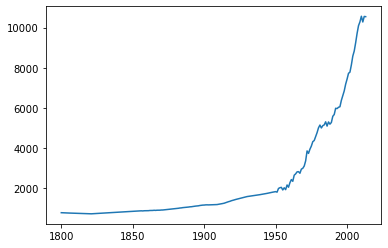

In [965]:
df_gdp_per_capita.loc['Tunisia'].plot(kind='line');

Visualizing the development of GINI index in Tunisia:

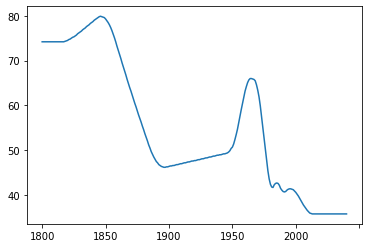

In [966]:
df_gini.loc['Tunisia'].plot(kind='line');

Visualizing the development of education for girls in Tunisia:

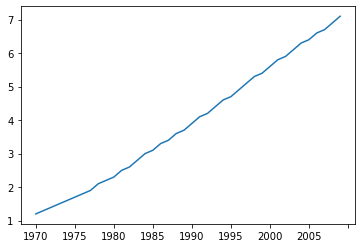

In [967]:
df_school_fem.loc['Tunisia'].plot(kind='line');

Visualizing the development of child mortality in Tunisia:

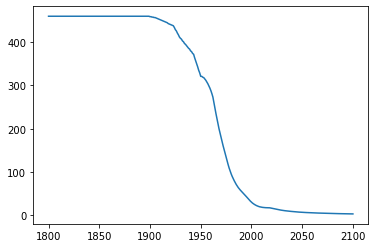

In [968]:
df_child_mort.loc['Tunisia'].plot(kind='line');

Visualizing the development of life expectancy in Tunisia:

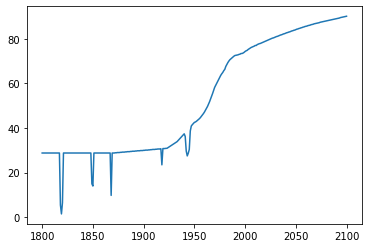

In [969]:
df_life_exp.loc['Tunisia'].plot(kind='line');

<a id='conclusions'></a>
## Conclusions

Finally, here are briefly my conclusions from this analysis.

### Results

The data suggests that there seems to be a strong correlation between: 
- child mortality and life expectancy
- child mortality and the mean years of girls' education
- life expectancy and the mean years of girls' education
- the size of the population and GDP

Here are some observations:

- A lot of countries have improved their schooling system for girls since 1970.
- Some of the high GDP countries have not developed that much between 1970 and 2009 which might imply that they were more mature countries already in the 1970s.
- Some of the countries are doing worse in 2009 than in the 1970s.
- Zimbabwe seems to have developed the least with all the studied change variables.
- Tunisia is the leader with highest average rank of positive change with all the variables. Congrats Tunisia!
- The least developed region within the timeframe is the East Europe.
- Most progress has happened in the Middle East and also in the North and Sub Saharan Africa.

### Limitations

My analysis is very limited with variables that I chose would be interesting to research. All the statistical conclusions are only giving a small idea of the bigger picture. It would be great to study the statistics of these countries a bit further but the scope of my data analysis is now limited to these categories and the statistical skills I currently have.

To be able to study the countries in a deeper level I would research all the countries one by one and go further in figuring out a country with the most development by adding more data and variables to the analysis.

### Future

In the future, it would be interesting to continue researching the findings from the data with these questions:

<ul>
    <li>Which historical events might have affected the economic growth?</li>
    <li>Which structural or geographical reasons might affect the country's development?</li>
</ul>